In [60]:
import pandas as pd
import os
import numpy as np
df = pd.DataFrame()
path = os.listdir("C:\\Users\\PRECIOUS ONYEDEKE\\Documents\\DATA-ENGINEERING\\internship class\\Data-Engineering\\SALES DATA")
for file in path:
    new_df = pd.read_csv("C:\\Users\\PRECIOUS ONYEDEKE\\Documents\\DATA-ENGINEERING\\internship class\\Data-Engineering\\SALES DATA\\" +file)
    df = pd.concat([new_df, df])
    df.dropna(inplace= True)
    df.drop_duplicates(keep = False, inplace = True)
    
df

#DATA CLEANING PROCESS

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,248151,AA Batteries (4-pack),4,3.84,09/17/19 14:44,"380 North St, Los Angeles, CA 90001"
1,248152,USB-C Charging Cable,2,11.95,09/29/19 10:19,"511 8th St, Austin, TX 73301"
2,248153,USB-C Charging Cable,1,11.95,09/16/19 17:48,"151 Johnson St, Los Angeles, CA 90001"
3,248154,27in FHD Monitor,1,149.99,09/27/19 07:52,"355 Hickory St, Seattle, WA 98101"
4,248155,USB-C Charging Cable,1,11.95,09/01/19 19:03,"125 5th St, Atlanta, GA 30301"
...,...,...,...,...,...,...
18378,194090,Google Phone,1,600,04/08/19 17:11,"177 Jackson St, Los Angeles, CA 90001"
18379,194091,AA Batteries (4-pack),1,3.84,04/15/19 16:02,"311 Forest St, Austin, TX 73301"
18380,194092,AAA Batteries (4-pack),2,2.99,04/28/19 14:36,"347 Sunset St, San Francisco, CA 94016"
18381,194093,AA Batteries (4-pack),1,3.84,04/14/19 15:09,"835 Lake St, Portland, OR 97035"


In [18]:
df.describe()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,185422,185422,185422,185422,185422,185422
unique,178180,19,9,23,142230,140615
top,160873,USB-C Charging Cable,1,11.95,12/15/19 20:16,"193 Forest St, San Francisco, CA 94016"
freq,5,21815,168030,21815,8,9


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185422 entries, 0 to 18382
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          185422 non-null  object
 1   Product           185422 non-null  object
 2   Quantity Ordered  185422 non-null  object
 3   Price Each        185422 non-null  object
 4   Order Date        185422 non-null  object
 5   Purchase Address  185422 non-null  object
dtypes: object(6)
memory usage: 9.9+ MB


In [61]:

df['Quantity Ordered']=df['Quantity Ordered'].astype(float)
df['Price Each']=df['Price Each'].astype(float)
df['Order Date']=pd.to_datetime(df['Order Date'])
#CONVERTING DATATYPE FOR QUANTITY ORDERED AND PRICE EACH TO FLOAT


In [62]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,248151,AA Batteries (4-pack),4.0,3.84,2019-09-17 14:44:00,"380 North St, Los Angeles, CA 90001"
1,248152,USB-C Charging Cable,2.0,11.95,2019-09-29 10:19:00,"511 8th St, Austin, TX 73301"
2,248153,USB-C Charging Cable,1.0,11.95,2019-09-16 17:48:00,"151 Johnson St, Los Angeles, CA 90001"
3,248154,27in FHD Monitor,1.0,149.99,2019-09-27 07:52:00,"355 Hickory St, Seattle, WA 98101"
4,248155,USB-C Charging Cable,1.0,11.95,2019-09-01 19:03:00,"125 5th St, Atlanta, GA 30301"
...,...,...,...,...,...,...
18378,194090,Google Phone,1.0,600.00,2019-04-08 17:11:00,"177 Jackson St, Los Angeles, CA 90001"
18379,194091,AA Batteries (4-pack),1.0,3.84,2019-04-15 16:02:00,"311 Forest St, Austin, TX 73301"
18380,194092,AAA Batteries (4-pack),2.0,2.99,2019-04-28 14:36:00,"347 Sunset St, San Francisco, CA 94016"
18381,194093,AA Batteries (4-pack),1.0,3.84,2019-04-14 15:09:00,"835 Lake St, Portland, OR 97035"


In [24]:
df.dtypes

Order ID                    object
Product                     object
Quantity Ordered           float64
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
dtype: object

In [63]:
#MULTIPLICATION OF QUANTITY ORDERED BY PRICE EACH

df['Sales']=(df['Quantity Ordered']) * (df['Price Each'])

#A LAMBDA TO SPLIT AND PICK OUT THE CITIES THEN STORES IN A NEW COLUMN

df['cities'] =df['Purchase Address'].apply(lambda x: x.split(", ")[-2])
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,cities
0,248151,AA Batteries (4-pack),4.0,3.84,2019-09-17 14:44:00,"380 North St, Los Angeles, CA 90001",15.36,Los Angeles
1,248152,USB-C Charging Cable,2.0,11.95,2019-09-29 10:19:00,"511 8th St, Austin, TX 73301",23.90,Austin
2,248153,USB-C Charging Cable,1.0,11.95,2019-09-16 17:48:00,"151 Johnson St, Los Angeles, CA 90001",11.95,Los Angeles
3,248154,27in FHD Monitor,1.0,149.99,2019-09-27 07:52:00,"355 Hickory St, Seattle, WA 98101",149.99,Seattle
4,248155,USB-C Charging Cable,1.0,11.95,2019-09-01 19:03:00,"125 5th St, Atlanta, GA 30301",11.95,Atlanta
...,...,...,...,...,...,...,...,...
18378,194090,Google Phone,1.0,600.00,2019-04-08 17:11:00,"177 Jackson St, Los Angeles, CA 90001",600.00,Los Angeles
18379,194091,AA Batteries (4-pack),1.0,3.84,2019-04-15 16:02:00,"311 Forest St, Austin, TX 73301",3.84,Austin
18380,194092,AAA Batteries (4-pack),2.0,2.99,2019-04-28 14:36:00,"347 Sunset St, San Francisco, CA 94016",5.98,San Francisco
18381,194093,AA Batteries (4-pack),1.0,3.84,2019-04-14 15:09:00,"835 Lake St, Portland, OR 97035",3.84,Portland


In [7]:
import matplotlib.pyplot as plt

In [8]:
#GROUP AND CITIES AND SUM THE SALES ACCOURDING TO THE CITIES
sale = df.groupby(['cities'])['Sales'].sum()
sale

cities
Atlanta          2792899.56
Austin           1816506.91
Boston           3655613.29
Dallas           2762772.52
Los Angeles      5444037.76
New York City    4659416.85
Portland         2318173.27
San Francisco    8247283.19
Seattle          2742336.56
Name: Sales, dtype: float64

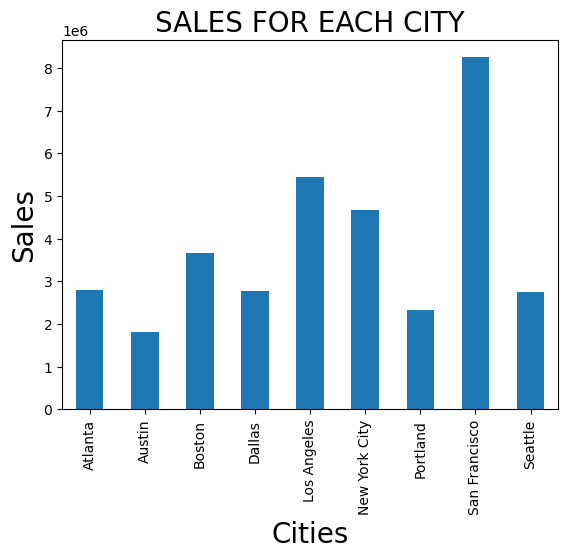

In [28]:
#PLOT SALES FOR EACH CITY
sale.plot(kind='bar')
plt.xlabel("Cities", size= 20)
plt.ylabel("Sales", size= 20)
plt.title("SALES FOR EACH CITY", size=20)
plt.show()


In [65]:
#df['Month']=pd.Datetime(df['Order Date']).month_name()
df['Month']=df['Order Date'].dt.month_name()
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,cities,Month
0,248151,AA Batteries (4-pack),4.0,3.84,2019-09-17 14:44:00,"380 North St, Los Angeles, CA 90001",15.36,Los Angeles,September
1,248152,USB-C Charging Cable,2.0,11.95,2019-09-29 10:19:00,"511 8th St, Austin, TX 73301",23.90,Austin,September
2,248153,USB-C Charging Cable,1.0,11.95,2019-09-16 17:48:00,"151 Johnson St, Los Angeles, CA 90001",11.95,Los Angeles,September
3,248154,27in FHD Monitor,1.0,149.99,2019-09-27 07:52:00,"355 Hickory St, Seattle, WA 98101",149.99,Seattle,September
4,248155,USB-C Charging Cable,1.0,11.95,2019-09-01 19:03:00,"125 5th St, Atlanta, GA 30301",11.95,Atlanta,September
...,...,...,...,...,...,...,...,...,...
18378,194090,Google Phone,1.0,600.00,2019-04-08 17:11:00,"177 Jackson St, Los Angeles, CA 90001",600.00,Los Angeles,April
18379,194091,AA Batteries (4-pack),1.0,3.84,2019-04-15 16:02:00,"311 Forest St, Austin, TX 73301",3.84,Austin,April
18380,194092,AAA Batteries (4-pack),2.0,2.99,2019-04-28 14:36:00,"347 Sunset St, San Francisco, CA 94016",5.98,San Francisco,April
18381,194093,AA Batteries (4-pack),1.0,3.84,2019-04-14 15:09:00,"835 Lake St, Portland, OR 97035",3.84,Portland,April


In [71]:
#SUMS THE SALES ACCORDING TO THE MONTHS
_month = df.groupby(['Month'])['Sales'].sum()
_month

Month
April        3387765.72
August       2237698.86
December     4603148.06
February     2198133.74
January      1820569.59
July         2645146.88
June         2574758.04
March        2802846.32
May          3148625.71
November     3196146.90
October      3732828.84
September    2091371.25
Name: Sales, dtype: float64

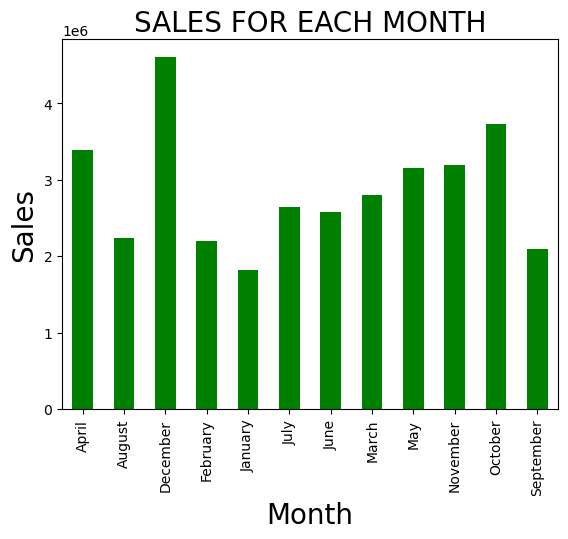

In [67]:
#PLOTS THE SALES FOR EACH MONTH
_month.plot(kind='bar', color='green')
plt.xlabel("Month", size= 20)
plt.ylabel("Sales", size= 20)
plt.title("SALES FOR EACH MONTH", size=20)
plt.show()


In [14]:
#GROUPS THE PRODUCT
prod = df.groupby(['cities'])['Product'].count()
prod


cities
Atlanta          14845
Austin            9875
Boston           19868
Dallas           14774
Los Angeles      29523
New York City    24818
Portland         12433
San Francisco    44592
Seattle          14694
Name: Product, dtype: int64

In [105]:
a= ('20in Monitor', '27in 4K Gaming Monitor', '27in FHD Monitor', '34in Ultrawide Monitor',        
'Apple Airpods Headphones',      
'Bose SoundSport Headphones'   
'Google Phone',                  
'Macbook Pro Laptop',            
'ThinkPad Laptop',               
'Vareebadd Phone',                
'Wired Headphones',               
'iPhone')                      


In [162]:
#THE LOOP ITERATES THROUGH THE PRODUCTS COLUMN AND SELCTS ONLY THE GADGETS AND STORES IN THE COLUMN GADGETS
gadget=[]
for i in df['Product']:
    if i in  a:
        gadget.append(i)
    elif i not in a:
        gadget.append(None)
        
df['Gadget']= gadget
df


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,cities,month,Gadget
0,248151,AA Batteries (4-pack),4.0,3.84,09/17/19 14:44,"380 North St, Los Angeles, CA 90001",15.36,Los Angeles,09,None
1,248152,USB-C Charging Cable,2.0,11.95,09/29/19 10:19,"511 8th St, Austin, TX 73301",23.90,Austin,09,None
2,248153,USB-C Charging Cable,1.0,11.95,09/16/19 17:48,"151 Johnson St, Los Angeles, CA 90001",11.95,Los Angeles,09,None
3,248154,27in FHD Monitor,1.0,149.99,09/27/19 07:52,"355 Hickory St, Seattle, WA 98101",149.99,Seattle,09,27in FHD Monitor
4,248155,USB-C Charging Cable,1.0,11.95,09/01/19 19:03,"125 5th St, Atlanta, GA 30301",11.95,Atlanta,09,None
...,...,...,...,...,...,...,...,...,...,...
18378,194090,Google Phone,1.0,600.00,04/08/19 17:11,"177 Jackson St, Los Angeles, CA 90001",600.00,Los Angeles,04,None
18379,194091,AA Batteries (4-pack),1.0,3.84,04/15/19 16:02,"311 Forest St, Austin, TX 73301",3.84,Austin,04,None
18380,194092,AAA Batteries (4-pack),2.0,2.99,04/28/19 14:36,"347 Sunset St, San Francisco, CA 94016",5.98,San Francisco,04,None
18381,194093,AA Batteries (4-pack),1.0,3.84,04/14/19 15:09,"835 Lake St, Portland, OR 97035",3.84,Portland,04,None


In [184]:
#GROUPS THE CITY BY THE NUMBER OF GADGETS 
gadget = df.groupby(['cities'])['Gadget'].count()
print(gadget)

cities
Atlanta           6039
Austin            4063
Boston            8078
Dallas            6020
Los Angeles      12124
New York City    10251
Portland          5141
San Francisco    18191
Seattle           6126
Name: Gadget, dtype: int64


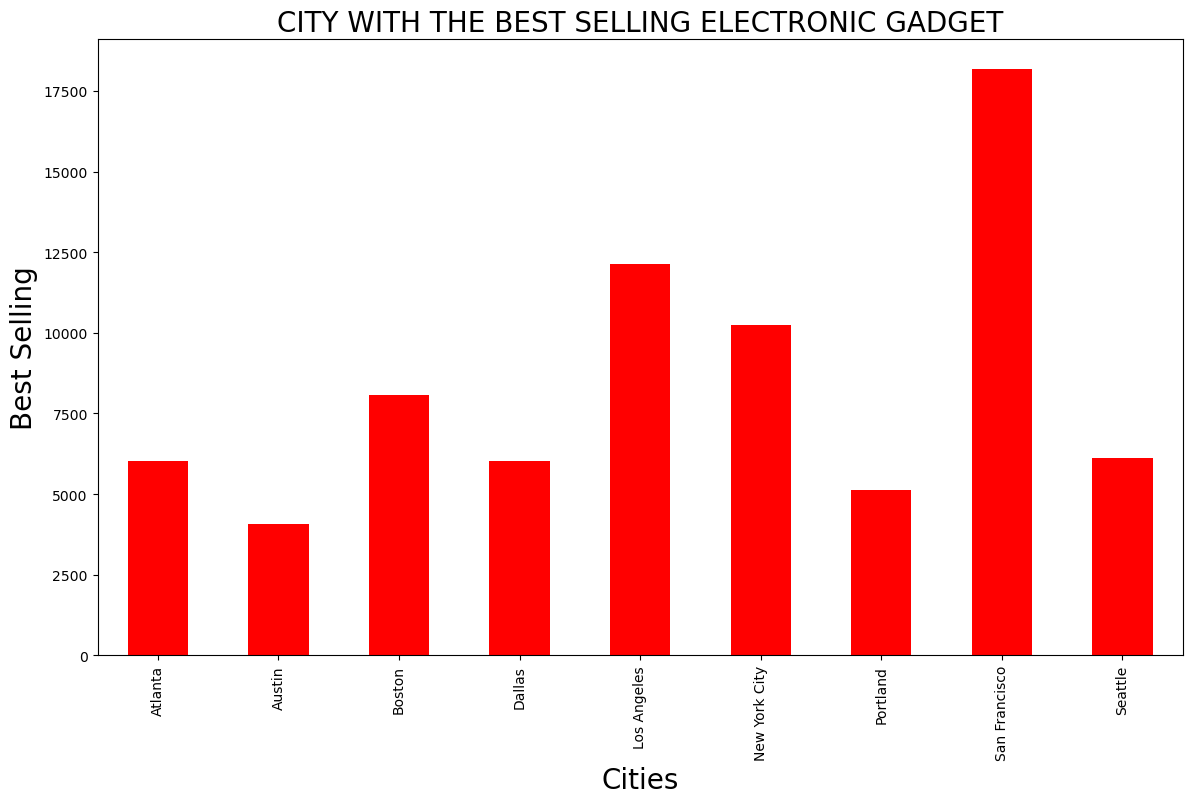

In [185]:
#PLOTS THE CITY WITH THE BEST SELLING ELECTRONIC GADGETS
gadget.plot(kind='bar', color='red')
plt.xlabel("Cities", size= 20)
plt.ylabel("Best Selling", size= 20)
plt.title("CITY WITH THE BEST SELLING ELECTRONIC GADGET", size=20)
plt.show()
